<a href="https://colab.research.google.com/github/Akarshini/PROJECTS/blob/main/AdvertisingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Satement**
 - Model and Investigate Sales VS Advertising dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analyzing the data

---
Observations are
- There are no null values
- There are 200 rows and 4 columns
- Column names are TV, Radio, Newspaper, Sales
- Sales is our Target column



In [ ]:
df=pd.read_csv('Advertising.csv')
df

FileNotFoundError: ignored

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Visualizing the data

---
Observations are
- TV and Sales are more linear
- Whereas Newspaper and Sales are more scattered
- There is no conclusive correlation between predictors


Text(0.5, 1.0, 'Newspaper VS Sales')

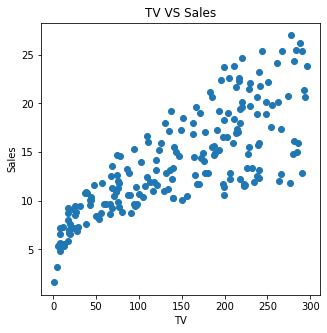

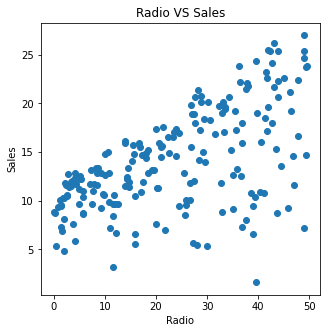

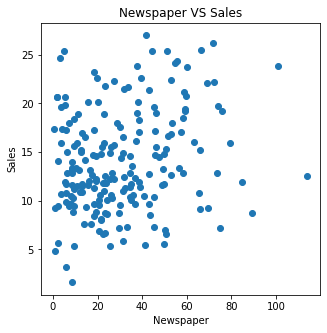

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
plt.scatter(df['TV'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV VS Sales")

fig,ax=plt.subplots(figsize=(5,5))
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio VS Sales")

fig,ax=plt.subplots(figsize=(5,5))
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel("Sales")
plt.title("Newspaper VS Sales")

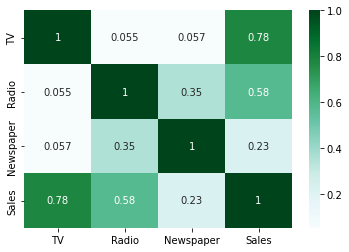

In [ ]:
sns.heatmap(df.corr(),cmap="BuGn",annot=True)
plt.show()

- Splitting into testing and training data
- Modeling the data using Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= df.drop("Sales",axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
x_train.shape

(150, 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred


array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

Text(0.5, 1.0, 'Actual vs Predicted')

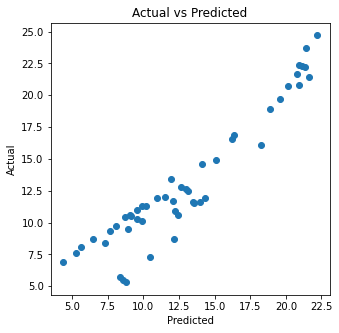

In [ ]:

fig,ax = plt.subplots(figsize=(5,5))
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')

Observations are

---
- The model is built and the graph between actual and predicted are almost linear so we now check accuracy using MSE and r2 values



In [ ]:
#Defining function for testing using individual parameters
def linreg_model(xtrain, xtest):
    linreg = LinearRegression()
    linreg.fit(xtrain, y_train)
    y_pred = linreg.predict(xtest)

    print("R2:", r2_score(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))

    f, ax = plt.subplots(figsize=(5,5))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")

    return {"R2": r2_score(y_pred, y_test) * 100,
            "MSE": mean_squared_error(y_pred, y_test)}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

R2: 0.8843196200174288
MSE: 2.880023730094193


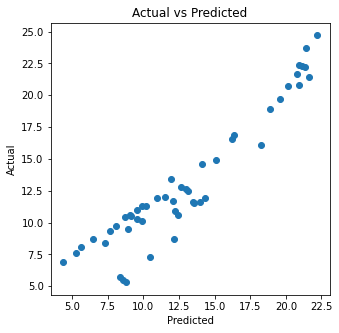

In [ ]:
#USING ALL
linreg_all_results = linreg_model(x_train, x_test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


R2: 0.43100480902944716
MSE: 9.179298570399794


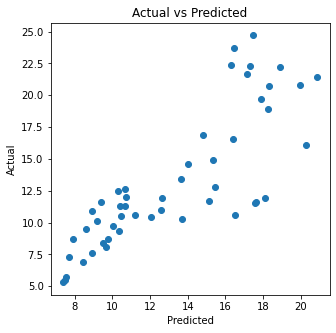

In [ ]:
# FOR ONLY TV
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))


R2: 0.8850764340201793
MSE: 2.8539947557761023


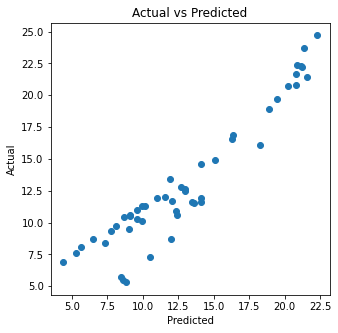

In [ ]:
# FOR BOTH TV AND RADIO
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

Conclusions are:

---
- We observe that TV and Radio combined gives sales much than others
- So, advertising companies should spend more on Radio and TV Advertisements

